

# Análisis Completo de Regresión Lineal

Este notebook muestra paso a paso cómo realizar un análisis de **Regresión Lineal** empleando un conjunto de datos que contiene:
- **valuationdate**: fecha de valoración (opcional para el modelo)
- **revenues**: ingresos
- **ebit**: utilidad antes de intereses e impuestos
- **depreciation**: depreciación
- **capex**: gastos de capital
- **ncwc**: cambio en capital de trabajo neto
- **bv**: (posiblemente) valor en libros
- **y**: variable objetivo que deseamos predecir (por ejemplo, un valor financiero o de valoración)

Iremos desde la **carga** y **exploración** del dataset hasta la **interpretación** de coeficientes y la **evaluación** de métricas importantes.

In [25]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv

--2025-03-05 22:35:59--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv [following]
--2025-03-05 22:35:59--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82415 (80K) [text/plain]
Saving to: ‘enterprise.csv.1’

enterprise.csv.1    100%[============

## Paso 0: Importar librerías y configuración

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)

## Paso 1: Carga y Exploración de Datos (EDA)

En este primer bloque, cargaremos nuestro dataset y realizaremos un Análisis Exploratorio básico.

In [28]:
# prompt: En este primer bloque, cargaremos nuestro dataset y realizaremos un Análisis Exploratorio básico.

import pandas as pd
df = pd.read_csv('enterprise.csv')
print(df.head())
print(df.info())
print(df.describe())


  valuationdate    revenues          ebit  depreciation      capex  \
0    30/06/2011  86470.7000  10387.500000      6429.000   3512.000   
1    31/12/2010  84754.2000  14031.180800      8658.600  17172.500   
2    30/09/2016  15653.4800    221.347452       647.239    749.478   
3    30/09/2018  62001.3297   7551.761957      1808.830   2702.850   
4    30/09/2014   1242.8300    497.141501       232.027   1552.908   

          ncwc         bv             y  
0  16848.90000  47945.100   91760.80000  
1  12095.10000  66804.400  184461.70000  
2   1468.42800  10128.726   23323.68520  
3  11873.25464  27144.930  130202.79240  
4    149.97100   1463.052   11472.12267  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   valuationdate  1061 non-null   object 
 1   revenues       1061 non-null   float64
 2   ebit           1061 non-null   float64
 

### Estadísticas Descriptivas y Distribuciones

           revenues           ebit   depreciation          capex  \
count  1.061000e+03    1061.000000    1061.000000    1061.000000   
mean   1.632727e+05   24076.406810    8002.050367   10961.602205   
std    2.213828e+05   31871.076559   13898.135849   20250.735197   
min    8.560000e+01  -29982.979880      -5.690000    -694.661000   
25%    4.265958e+04    4522.900000     999.340000    1666.600000   
50%    1.082011e+05   12224.611950    3446.250000    4949.447000   
75%    1.862485e+05   32228.941870    8361.220000   11201.479000   
max    2.586712e+06  289541.300000  128993.500000  205525.700000   

                ncwc            bv             y  
count    1061.000000  1.061000e+03  1.061000e+03  
mean    22324.130946  8.057162e+04  3.292238e+05  
std     54636.421540  1.043500e+05  4.056701e+05  
min   -118819.899000 -1.503965e+04  3.692000e+02  
25%      3115.247000  1.689500e+04  6.981010e+04  
50%     10736.200000  4.172290e+04  1.850416e+05  
75%     23454.185000  1.147563

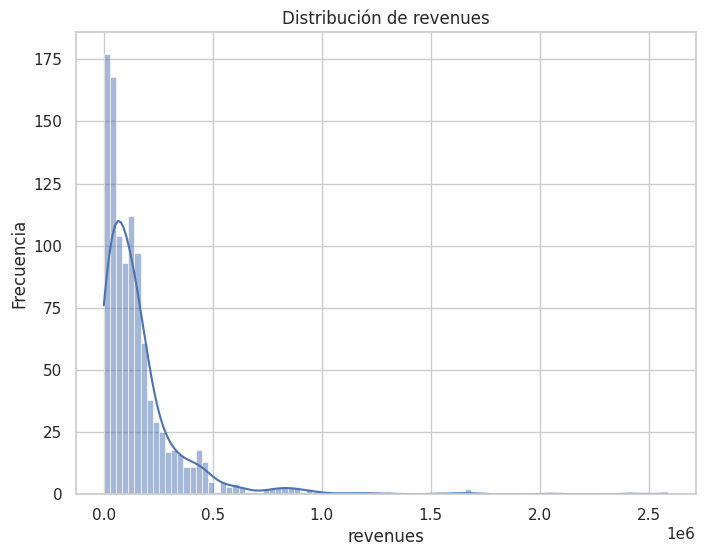

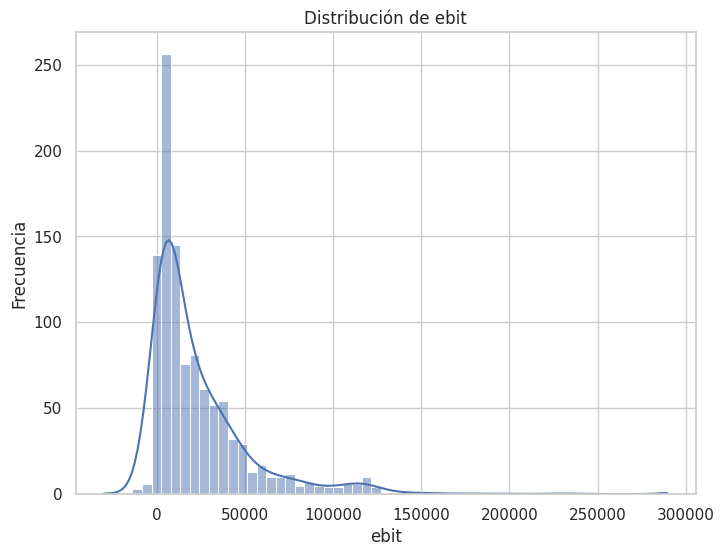

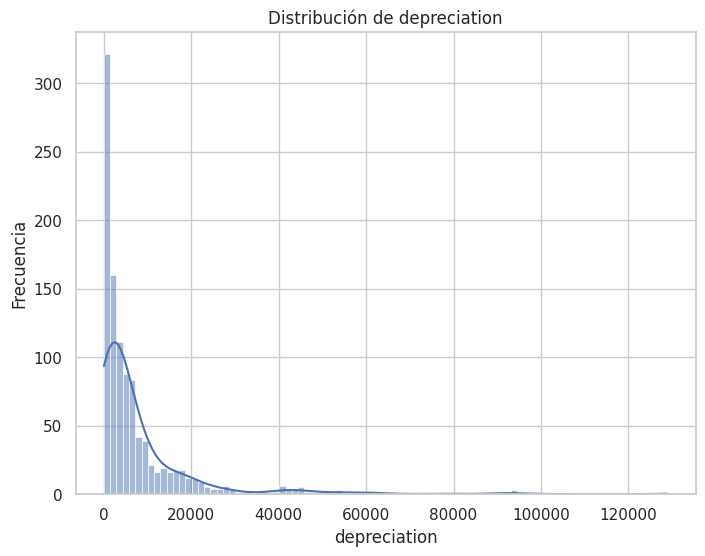

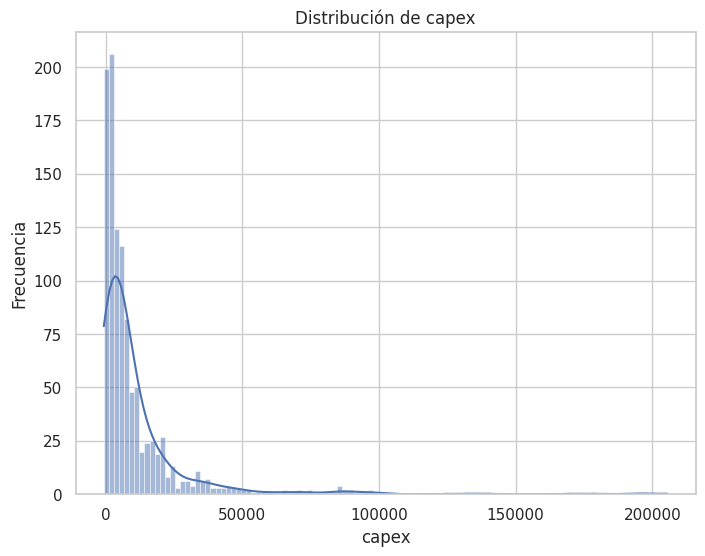

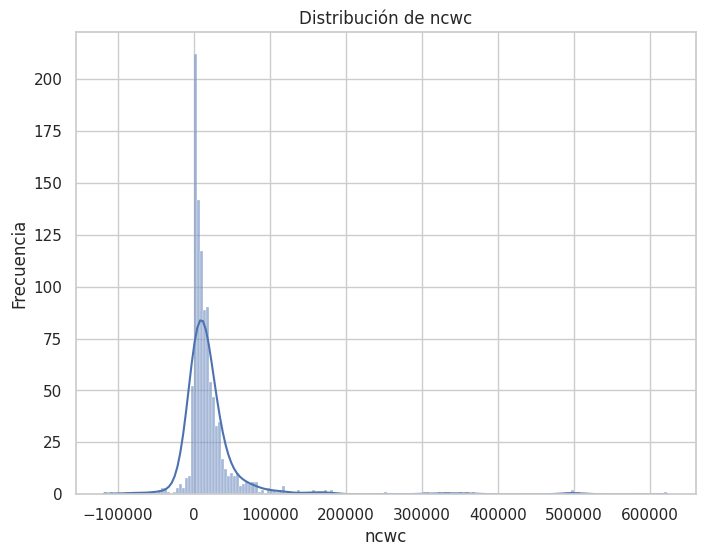

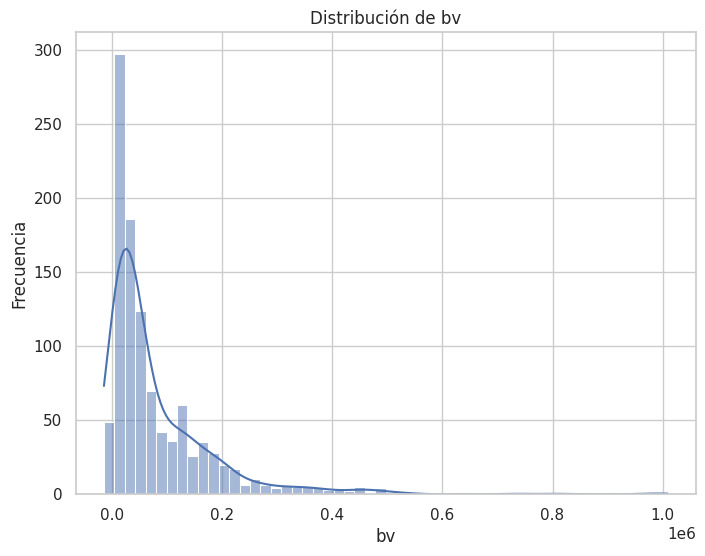

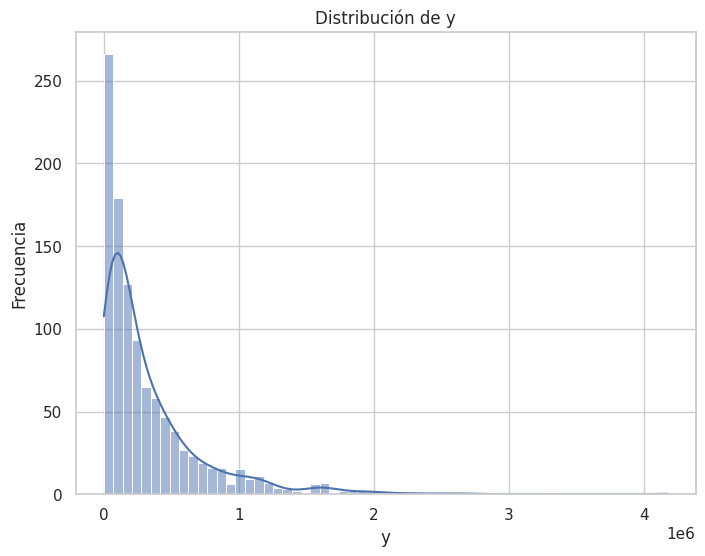

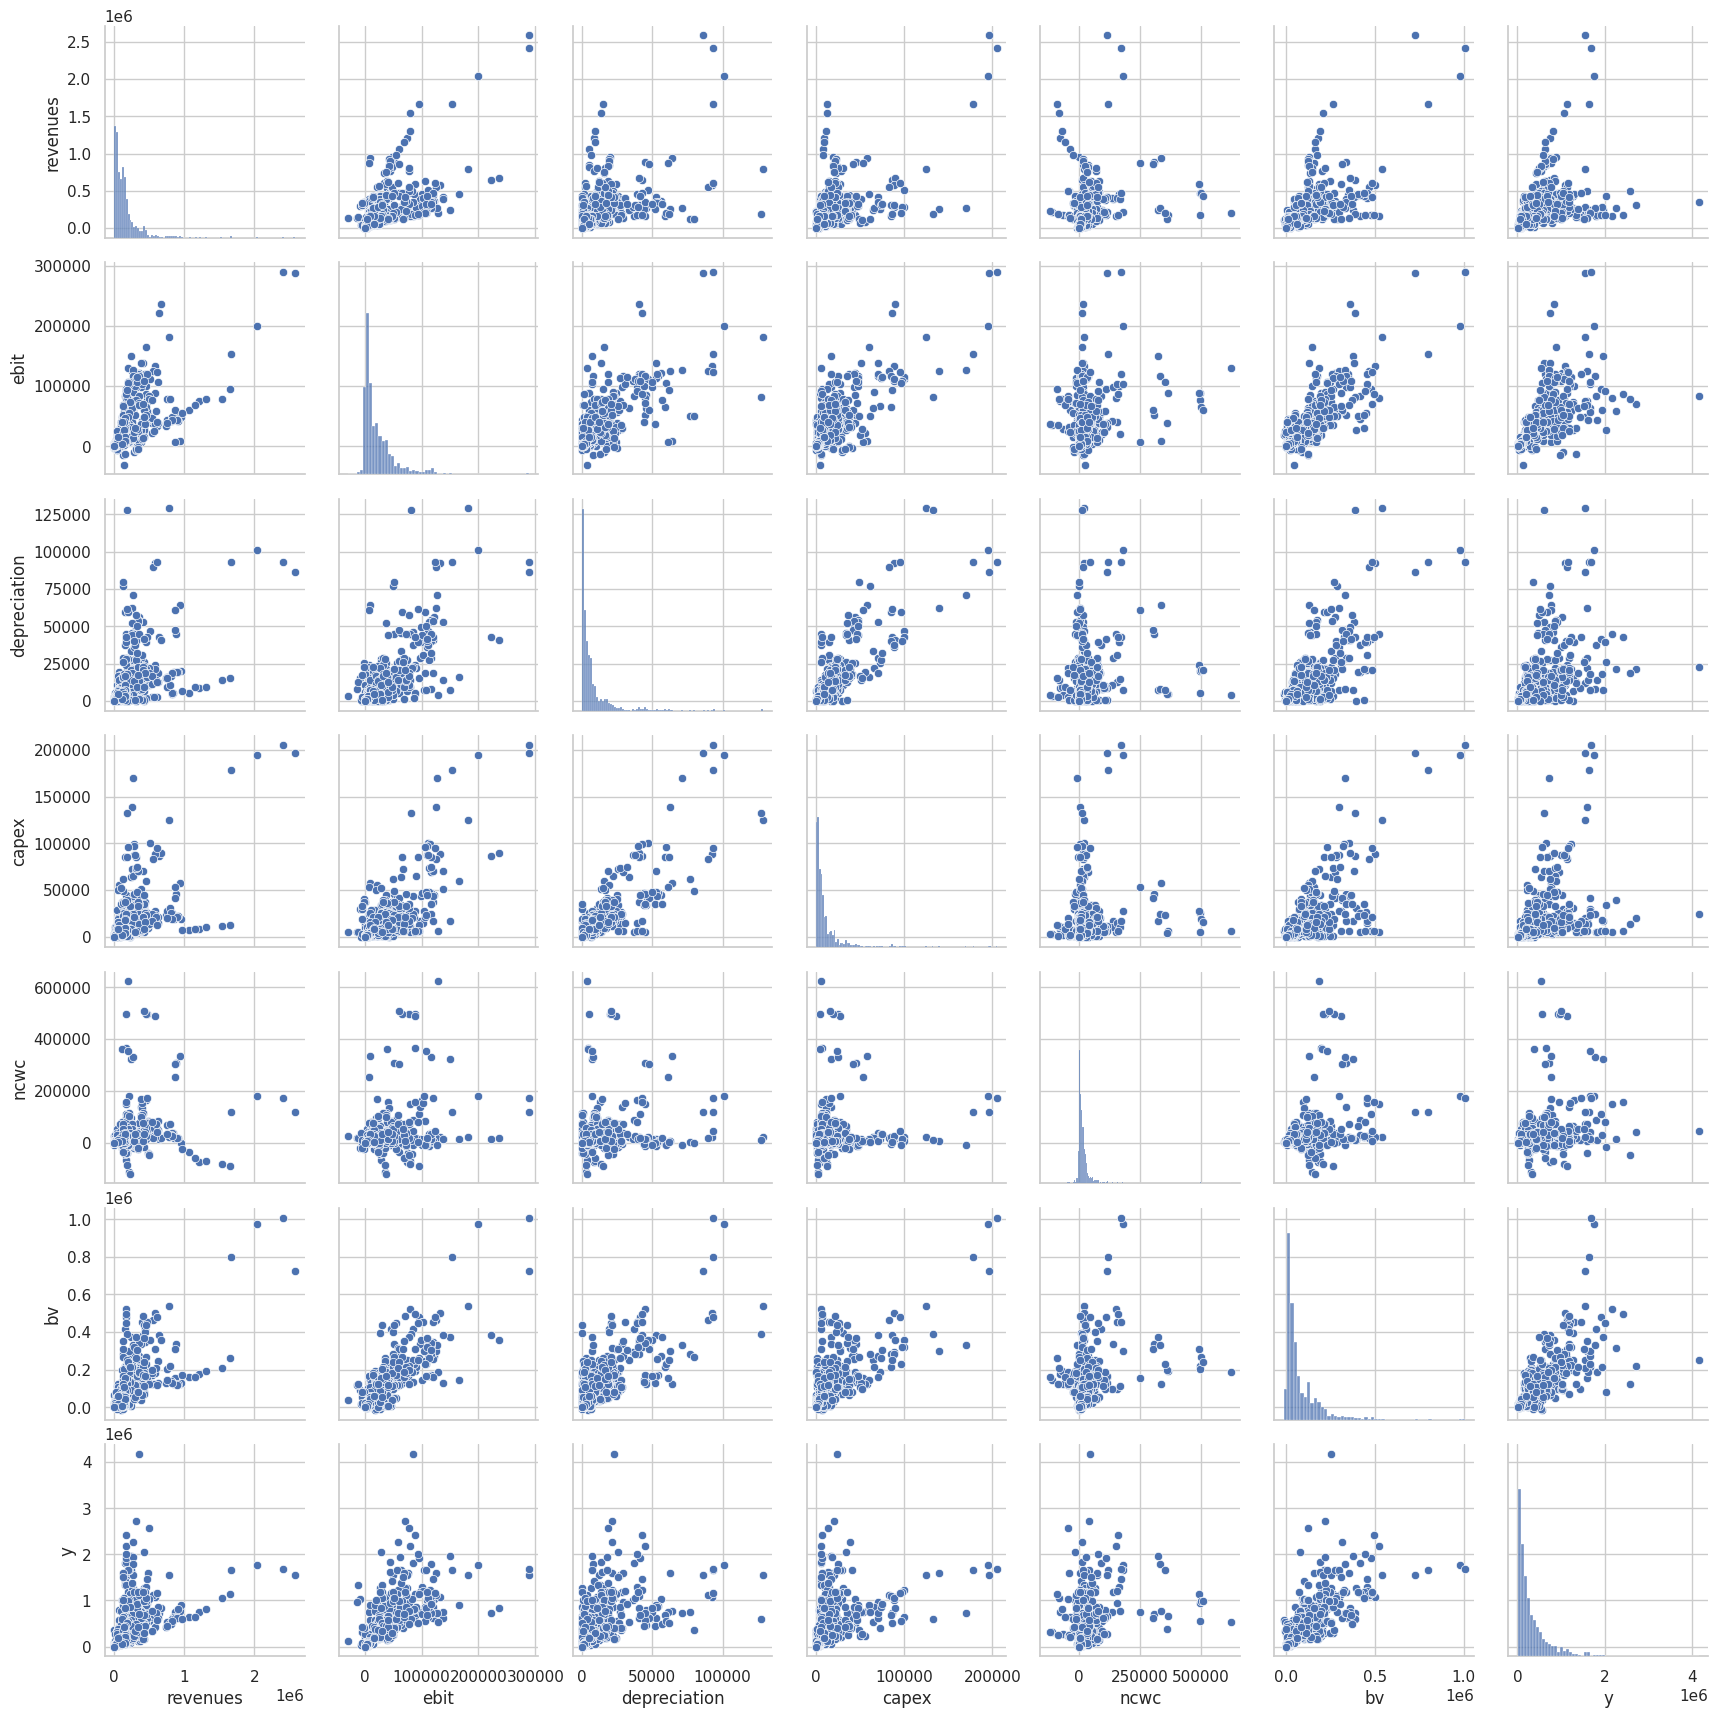

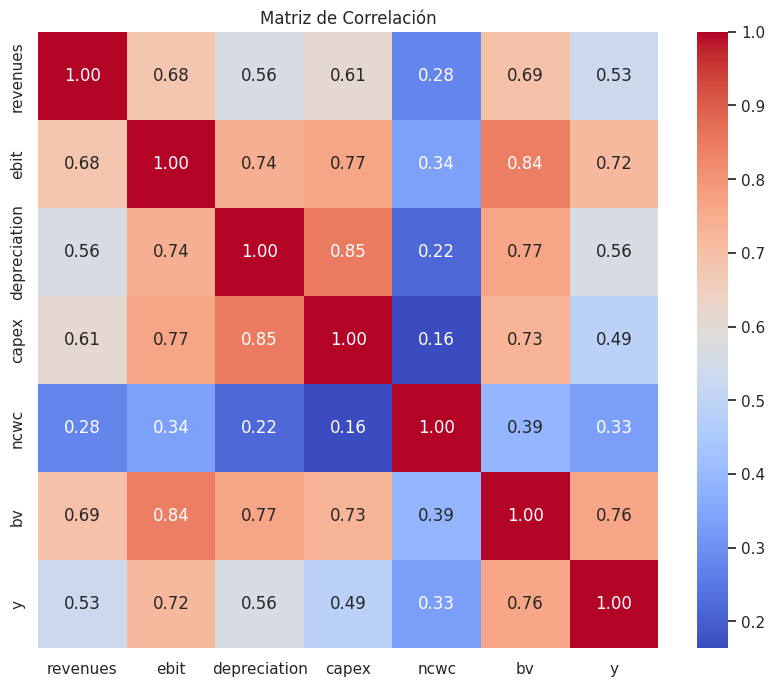

In [29]:
# prompt: Estadísticas Descriptivas y Distribuciones

import matplotlib.pyplot as plt
# ### Estadísticas Descriptivas y Distribuciones

# Mostrar estadísticas descriptivas
print(df.describe())

# Visualizar distribuciones de variables relevantes
numerical_cols = ['revenues', 'ebit', 'depreciation', 'capex', 'ncwc', 'bv', 'y']
for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

# Visualizar la relación entre pares de variables
sns.pairplot(df[numerical_cols])
plt.show()

# Matriz de correlación
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


### Preguntas de Reflexión (Exploración)
1. ¿Qué tipo de problema estás intentando resolver al usar `y` como variable objetivo?
2. ¿Notas valores atípicos (outliers) en alguna de las variables? ¿Cómo podría afectar a la regresión lineal?
3. ¿Crees que la columna `valuationdate` podría aportar información para predecir `y`, o la excluirías del análisis?

_Responde con tu razonamiento propio aquí._

1. ¿Qué tipo de problema estás intentando resolver al usar y como variable objetivo?
# Se intenta predecir el valor de 'y' utilizando las demás variables como predictores.  
# Sin más información sobre el contexto del dataset, es difícil determinar la naturaleza específica de 'y'.
# Podría ser el valor de la empresa, su valoración de mercado, su beneficio neto, etc.  La interpretación del problema depende de la definición de 'y'.

# 2. ¿Notas valores atípicos (outliers) en alguna de las variables? ¿Cómo podría afectar a la regresión lineal?
# Para identificar outliers de manera precisa se requieren métodos gráficos y estadísticos más sofisticados (boxplots, métodos de detección de outliers como el IQR).
# La exploración visual mediante histogramas y pairplots proporciona una primera indicación, pero no es definitiva.
# Los outliers pueden afectar significativamente la regresión lineal, ya que son puntos de datos que se desvían mucho del patrón general. Pueden sesgar los coeficientes de la regresión y aumentar el error del modelo.
# Se debe analizar la causa raíz de los outliers.  Algunos pueden ser errores en los datos, y en tal caso se deben corregir o eliminar. Otros, pueden representar casos válidos y atípicos que el modelo debe considerar.
# Las técnicas de robust scaling o transformaciones logarítmicas pueden ayudar a mitigar el impacto de los outliers.

# 3. ¿Crees que la columna valuationdate podría aportar información para predecir y, o la excluirías del análisis?
# La columna 'valuationdate' probablemente contenga información relevante, especialmente si se trata de un valor con tendencia temporal, como el precio de una acción.
# Si no hay una tendencia temporal clara, o si 'y' no es sensible a la fecha, la variable podría ser irrelevante para el modelo y podría eliminarse.
# Para determinar su importancia, se debe analizar la relación entre 'valuationdate' y 'y' a través de gráficos de series temporales o convertir 'valuationdate' en variables representativas como el año, el trimestre, o la diferencia en días con respecto a alguna fecha de referencia.
# Además, hay que tener en cuenta el potencial efecto de la fecha sobre las demás variables del modelo y ver si el efecto sobre 'y' es directo o indirecto a través de otras variables.


## Paso 2: Preparación y Limpieza de Datos

1. **Manejo de valores faltantes**.
2. **Posible eliminación** o **imputación** de outliers.
3. **Transformaciones** (escalado, log, etc.) si son necesarias.

valuationdate    0
revenues         0
ebit             0
depreciation     0
capex            0
ncwc             0
bv               0
y                0
dtype: int64


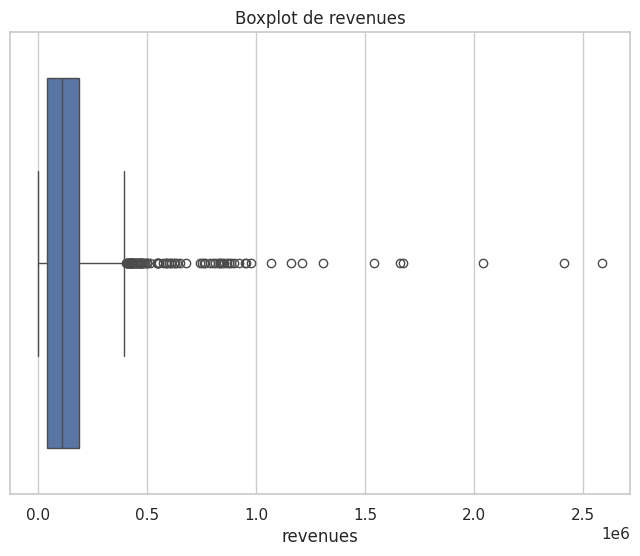

<ipython-input-30-887340e705d9>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['revenues_log'] = np.log1p(df['revenues'])
<ipython-input-30-887340e705d9>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])


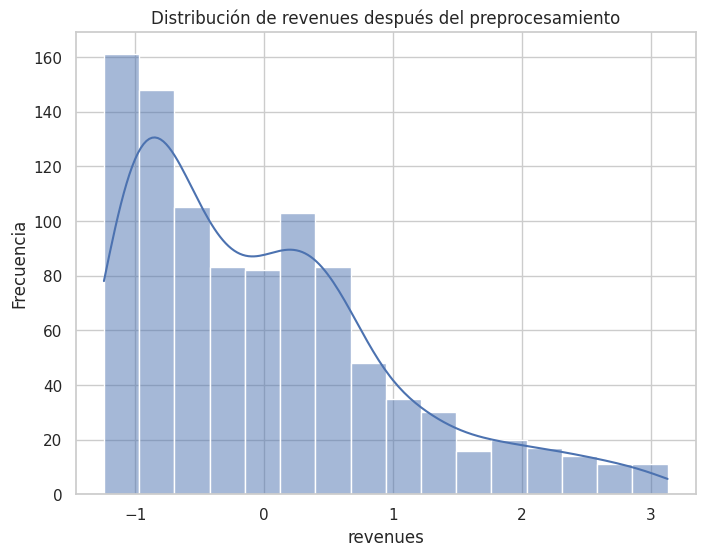

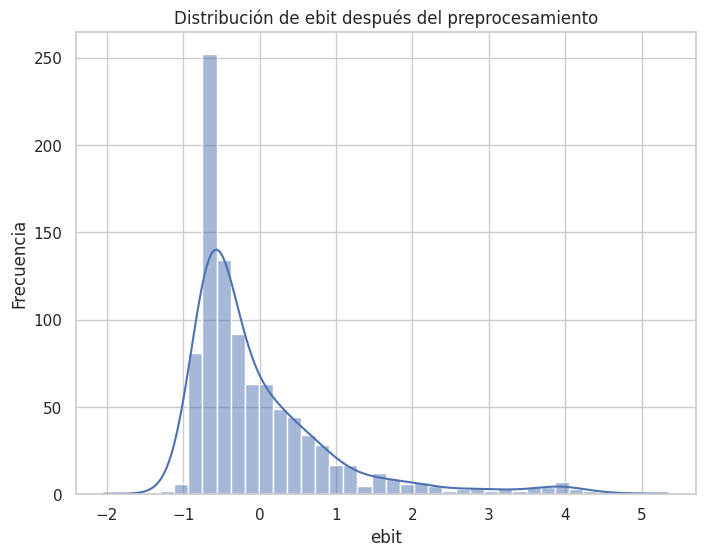

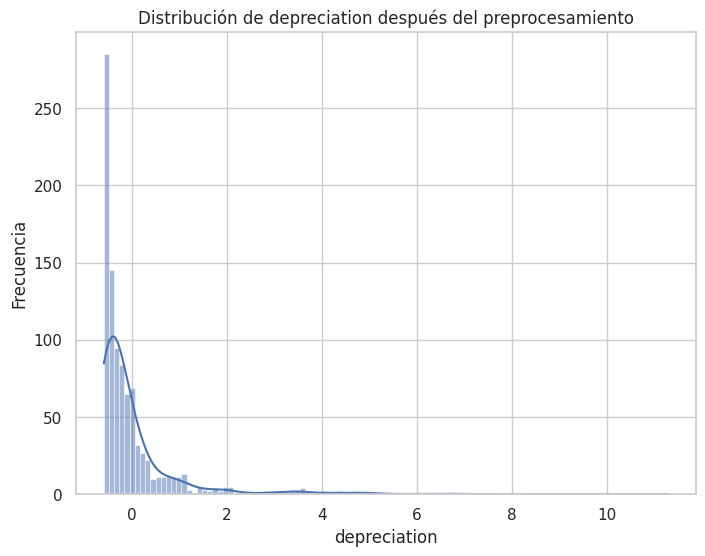

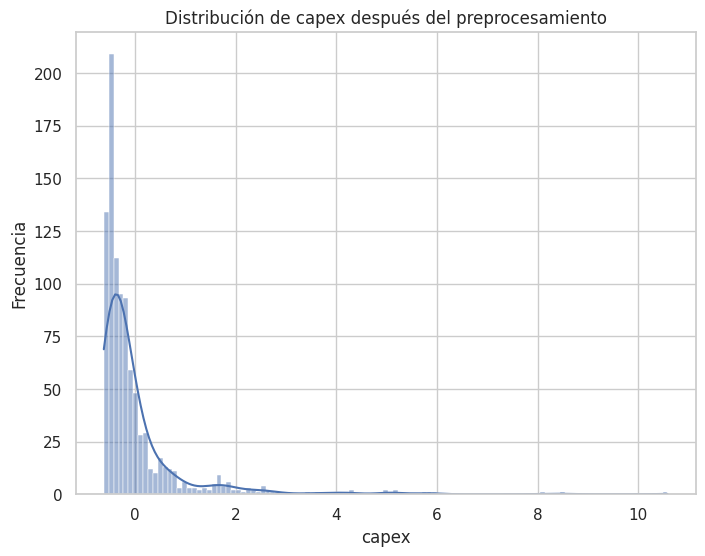

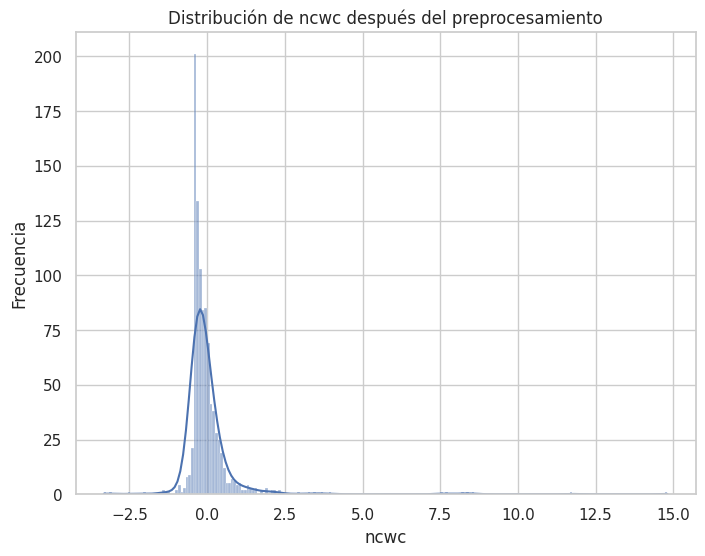

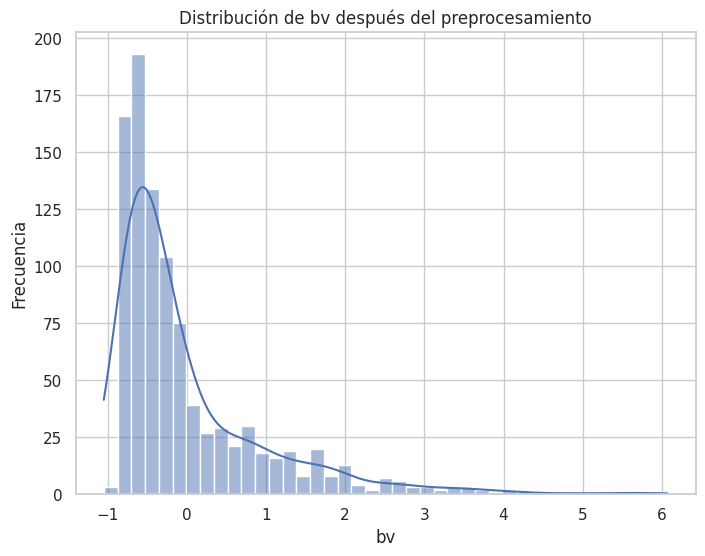

In [30]:
print(df.isnull().sum())

# Si hay valores faltantes, decidir si eliminar filas o imputar valores
# Ejemplo de imputación con la media para una columna específica
# if df['columna_con_nulos'].isnull().any():
#     df['columna_con_nulos'].fillna(df['columna_con_nulos'].mean(), inplace=True)


# Manejo de outliers (opcional)
# Identificar outliers usando boxplots o métodos estadísticos
# Ejemplo con boxplot para la columna 'revenues'
plt.figure()
sns.boxplot(x=df['revenues'])
plt.title('Boxplot de revenues')
plt.show()

# Eliminar outliers o transformarlos (por ejemplo, usando winsorizing o logaritmos)

# Ejemplo de eliminación de outliers (basado en el IQR)
Q1 = df['revenues'].quantile(0.25)
Q3 = df['revenues'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['revenues'] < (Q1 - 1.5 * IQR)) | (df['revenues'] > (Q3 + 1.5 * IQR)))]


# Transformaciones (si son necesarias)
# Ejemplo de transformación logarítmica
df['revenues_log'] = np.log1p(df['revenues'])


# Escalado de características (opcional, pero recomendado para regresión lineal)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols_to_scale = ['revenues', 'ebit', 'depreciation', 'capex', 'ncwc', 'bv'] # Selecciona las columnas numéricas a escalar
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])


# Visualizar las distribuciones después del preprocesamiento
for col in numerical_cols_to_scale:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col} después del preprocesamiento')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()



### Pregunta de Reflexión (Limpieza)
¿Por qué es relevante tratar valores faltantes y/o outliers **antes** de entrenar el modelo de regresión lineal?

_Responde con tu razonamiento aquí._

¿Por qué es relevante tratar valores faltantes y/o outliers antes de entrenar el modelo de regresión lineal?

Los valores faltantes y los outliers pueden afectar significativamente la precisión y la confiabilidad de un modelo de regresión lineal por varias razones:

1. **Sesgo en los coeficientes:** Los valores faltantes, especialmente si no se tratan adecuadamente, pueden introducir sesgos en la estimación de los coeficientes de la regresión.  Si los datos faltantes no son aleatorios (missing at random o MAR), la ausencia de información puede estar correlacionada con otras variables, distorsionando la relación entre las variables predictoras y la variable objetivo.  Las técnicas de imputación ayudan a mitigar este sesgo, pero es crucial seleccionar la técnica más adecuada según la naturaleza de los datos faltantes.  

2. **Incremento del error del modelo:** Los outliers son puntos de datos que se desvían significativamente del patrón general de los datos. Estos puntos pueden tener una influencia desproporcionada en la estimación de los parámetros de la regresión, aumentando el error del modelo y disminuyendo su capacidad predictiva.  Un modelo con pocos outliers puede presentar un buen ajuste con los datos disponibles, pero su capacidad de generalización podría ser pobre.

3. **Reducción de la precisión:** La presencia de outliers puede inflar la varianza del modelo, dando como resultado una menor precisión en las predicciones. La varianza describe la sensibilidad del modelo ante cambios en los datos, y la presencia de valores extremos puede hacer que la función de regresión sea más sensible a datos alejados del centro de la distribución.

4. **Violación de supuestos:** La regresión lineal asume que los errores son independientes e idénticamente distribuidos (iid) con media cero y varianza constante. Los outliers y los valores faltantes pueden violar estos supuestos, lo que a su vez compromete la validez de los resultados obtenidos.

5. **Interpretación de coeficientes:** La presencia de outlie

## Paso 4: Selección de Variables e Implementación del Modelo

1. **Seleccionar** cuáles columnas usarás como variables explicativas (features). Puede que uses todas o hagas una selección.
2. **Asignar** `X` (features) y `y` (variable objetivo).
3. **Dividir** en conjunto de entrenamiento (train) y conjunto de prueba (test).

In [31]:
features = ['revenues', 'ebit', 'depreciation', 'capex', 'ncwc', 'bv'] # Puedes modificar esta lista
X = df[features]
y = df['y']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Ajusta test_size y random_state si es necesario



### Preguntas de Reflexión (Selección de Variables)
1. ¿Por qué es importante separar los datos en train y test?
2. ¿Qué pasaría si entrenas y evalúas en el **mismo** conjunto de datos?

_Responde con tu razonamiento._


1. **¿Por qué es importante separar los datos en train y test?**
Separar los datos en conjuntos de entrenamiento (train) y prueba (test) es crucial para evaluar objetivamente el rendimiento de un modelo de aprendizaje automático.  El conjunto de entrenamiento se utiliza para ajustar los parámetros del modelo, mientras que el conjunto de prueba sirve para simular cómo se comportaría el modelo con datos nuevos e invisibles durante el entrenamiento.  Esta separación permite estimar la capacidad de generalización del modelo, es decir, su habilidad para predecir correctamente datos que no ha visto previamente. Si se evalúa el modelo con los mismos datos con los que fue entrenado, se obtendrá una medida optimista y poco realista de su desempeño.  Es posible que el modelo se haya sobreajustado (overfitting) a los datos de entrenamiento, memorizando el ruido y las peculiaridades específicas de ese conjunto en lugar de aprender patrones generales.  Al usar un conjunto de prueba independiente, se puede detectar el sobreajuste y evaluar la capacidad del modelo para generalizar a nuevos datos.

2. **¿Qué pasaría si entrenas y evalúas en el mismo conjunto de datos?**
Si se entrena y evalúa un modelo en el mismo conjunto de datos, la evaluación del rendimiento sería engañosamente alta. El modelo podría obtener una alta precisión en los datos de entrenamiento debido al sobreajuste, memorizando patrones específicos de ese conjunto.  Sin embargo, cuando se presente con nuevos datos, el modelo probablemente se desempeñará mal, ya que no aprendió patrones generales, sino que simplemente memorizó los datos de entrenamiento.  En este caso, no se tendría una medida confiable de la capacidad del modelo para realizar predicciones en datos reales, y el modelo podría ser desplegado para un entorno con resultados erróneos.


## Paso 5: Entrenar el Modelo de Regresión Lineal
Usaremos la clase `LinearRegression` de scikit-learn.

In [33]:
# Crear instancia del modelo
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)


LinearRegression()

In [34]:
# Extraer los coeficientes
intercept = model.intercept_
coef = model.coef_[0]

print(f"Intercept (beta_0): {intercept:.2f}")
print(f"Coeficiente (beta_1): {coef:.2f}")

Intercept (beta_0): 279575.72
Coeficiente (beta_1): 25804.32


### Interpretación de Coeficientes
Si la lista de features es `["revenues", "ebit", "depreciation", "capex", "ncwc", "bv"]` y tu `model.coef_` es algo como `[a, b, c, d, e, f]`, entonces:

\[ y \approx \beta_0 + a\cdot revenues + b\cdot ebit + c\cdot depreciation + d\cdot capex + e\cdot ncwc + f\cdot bv \]

Cada coeficiente indica cómo cambia `y` en promedio **por cada unidad** que se incrementa la variable (manteniendo las demás constantes).

In [35]:
coefficients = model.coef_
features = ['revenues', 'ebit', 'depreciation', 'capex', 'ncwc', 'bv']

# Imprimir la ecuación de regresión
print("Ecuación de Regresión:")
equation = f"y ≈ {model.intercept_:.2f}"
for i, coef in enumerate(coefficients):
    equation += f" + {coef:.2f} * {features[i]}"
print(equation)

# Imprimir la interpretación de cada coeficiente
print("\nInterpretación de los Coeficientes:")
for i, coef in enumerate(coefficients):
    print(f"- {features[i]}: Por cada unidad de incremento en {features[i]} (manteniendo las demás variables constantes), se espera un cambio promedio de {coef:.2f} en la variable 'y'.")


Ecuación de Regresión:
y ≈ 279575.72 + 25804.32 * revenues + 114466.01 * ebit + -17000.94 * depreciation + -70741.02 * capex + -21331.64 * ncwc + 245014.04 * bv

Interpretación de los Coeficientes:
- revenues: Por cada unidad de incremento en revenues (manteniendo las demás variables constantes), se espera un cambio promedio de 25804.32 en la variable 'y'.
- ebit: Por cada unidad de incremento en ebit (manteniendo las demás variables constantes), se espera un cambio promedio de 114466.01 en la variable 'y'.
- depreciation: Por cada unidad de incremento en depreciation (manteniendo las demás variables constantes), se espera un cambio promedio de -17000.94 en la variable 'y'.
- capex: Por cada unidad de incremento en capex (manteniendo las demás variables constantes), se espera un cambio promedio de -70741.02 en la variable 'y'.
- ncwc: Por cada unidad de incremento en ncwc (manteniendo las demás variables constantes), se espera un cambio promedio de -21331.64 en la variable 'y'.
- bv: P

## Paso 6: Evaluación y Validación del Modelo
Usaremos las siguientes métricas:
- **MSE (Mean Squared Error)**
- **MAE (Mean Absolute Error)**
- **R² (Coeficiente de Determinación)**

In [36]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate MAE
mae = np.mean(np.abs(y_test - y_pred)) # or use sklearn.metrics.mean_absolute_error
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.2f}")


Mean Squared Error (MSE): 82563880457.01
Mean Absolute Error (MAE): 123500.88
R-squared (R²): 0.56


### Preguntas de Reflexión (Evaluación)
1. ¿Por qué comparamos las métricas en **Entrenamiento** vs **Prueba**?
2. ¿Qué significa si el error en entrenamiento es **muy** distinto (mucho menor o mucho mayor) que en prueba?
3. ¿Cómo interpretar un **R²** cercano a 1, cercano a 0 o incluso negativo?

_Responde con tu razonamiento._

¿Por qué comparamos las métricas en Entrenamiento vs Prueba?**

Comparar las métricas de rendimiento del modelo en los conjuntos de entrenamiento y prueba es fundamental para evaluar su capacidad de generalización.  El modelo se entrena con los datos de entrenamiento, por lo que es esperable que tenga un buen rendimiento en este conjunto.  Sin embargo, el objetivo real es que el modelo pueda predecir correctamente datos nuevos y desconocidos. El conjunto de prueba simula datos reales nunca antes vistos por el modelo.  Si las métricas son significativamente diferentes entre ambos conjuntos, esto indica un problema de sobreajuste (overfitting) o subajuste (underfitting).

**¿Qué significa si el error en entrenamiento es muy distinto (mucho menor o mucho mayor) que en prueba?**

* **Error en entrenamiento mucho menor que en prueba (Overfitting):**  Significa que el modelo se ha ajustado demasiado a los detalles y ruido específicos del conjunto de entrenamiento. Ha memorizado los datos de entrenamiento en lugar de aprender patrones generales. Como resultado, su rendimiento es pobre con los datos de prueba, que son distintos.

* **Error en entrenamiento mucho mayor que en prueba (situación inusual, pero posible):** Esto puede indicar algún problema con los datos o la forma en que se dividieron los conjuntos de entrenamiento y prueba.  Por ejemplo, el conjunto de prueba podría contener datos muy diferentes a los de entrenamiento, o podría haber un error en la división de los datos.  También podría indicar subajuste, aunque en este caso normalmente se esperaría que ambos errores fueran altos.  Es menos común que el error de entrenamiento sea mayor, pero puede sugerir que la división de los datos no es representativa de la población general.

**¿Cómo interpretar un R² cercano a 1, cercano a 0 o incluso negativo?**

* **R² cercano a 1:** Indica un ajuste excelente del modelo a los datos.  El modelo explica la mayor parte de la varianza de la variable objetivo.  Sin embargo, un R² muy cercano a 1 puede ser sospechoso de sobreajuste.

* **R² cercano a 0:** Indica que el modelo no explica apenas la varianza de la variable objetivo. Es decir, no hay una relación lineal clara entre las variables predictoras y la variable a predecir.  En este caso, se debería evaluar otras alternativas de modelos o de variables predictoras.

* **R² negativo:**  Implica que el modelo es peor que simplemente predecir la media de la variable objetivo.  El modelo está capturando el ruido en los datos en lugar de la señal.  Esto puede ocurrir por diversos problemas: un modelo incorrecto, variables predictoras irrelevantes o incluso algún error en el cálculo del R².  Se deben revisar los supuestos del modelo y posiblemente cambiar el modelo a usar.


### Pregunta de Reflexión (Residuos)
Si observas un patrón claro en la gráfica de residuos (por ejemplo, forma de U), ¿qué podría indicar respecto a las **asunciones** de la regresión lineal?

_Responde con tu razonamiento._

Un patrón claro en la gráfica de residuos, como una forma de U, indica una violación del supuesto de homocedasticidad en la regresión lineal.  La homocedasticidad supone que la varianza de los errores es constante a lo largo de todos los valores predichos.  Una forma de U en los residuos sugiere que la varianza de los errores aumenta o disminuye sistemáticamente con los valores predichos.  En otras palabras, la dispersión de los puntos alrededor de la línea de regresión no es constante, sino que cambia con el nivel de predicción.

Esto implica que el modelo de regresión lineal puede no ser el más adecuado para los datos.  Las predicciones del modelo podrían ser menos precisas para ciertos rangos de valores predichos


## Paso 8: Interpretación y Conclusiones

1. **Revisa** los coeficientes: ¿son consistentes con la lógica de negocio? (p.ej., si `ebit` aumenta, esperas que `y` aumente o disminuya?).
2. **Observa** el nivel de error y R²: ¿el modelo es suficientemente bueno para su uso práctico?
3. **Considera** la posibilidad de:
   - Añadir más variables.
   - Aplicar **regresiones polinómicas** (X², X³) si sospechas no linealidad.
   - Usar **regularización** (Ridge, Lasso) si hay multicolinealidad o se requieren coeficientes más estables.

Mean Squared Error (MSE): 82563880457.01
Mean Absolute Error (MAE): 123500.88
R-squared (R²): 0.56

Coefficient Analysis:
revenues: 25804.32
ebit: 114466.01
  Ebit increasing, y increases. Consistent.
depreciation: -17000.94
capex: -70741.02
ncwc: -21331.64
bv: 245014.04

Model Performance:
R-squared: 0.5637
MSE: 82563880457.0099

Further Considerations:


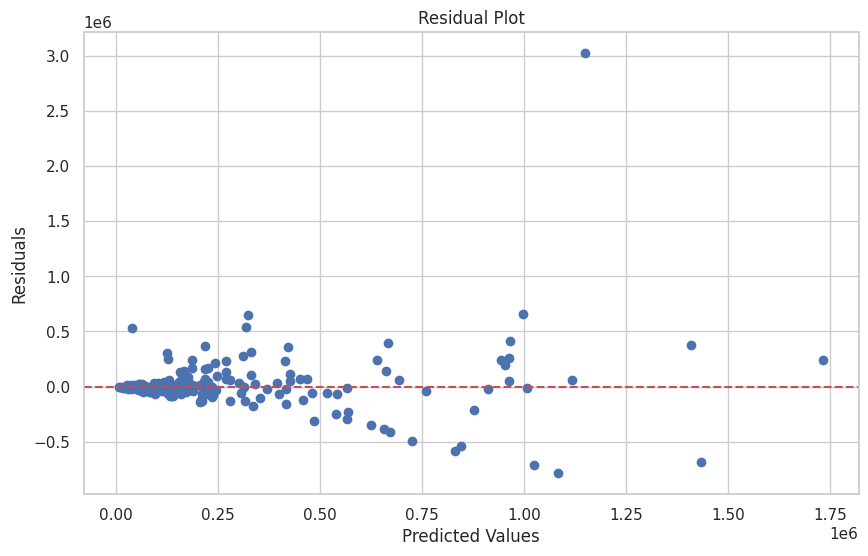

In [39]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

mae = np.mean(np.abs(y_test - y_pred))
print(f"Mean Absolute Error (MAE): {mae:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.2f}")

# Analyze Coefficients
print("\nCoefficient Analysis:")
for i, coef in enumerate(coefficients):
    print(f"{features[i]}: {coef:.2f}")
    if features[i] == 'ebit':
      if coef > 0:
        print("  Ebit increasing, y increases. Consistent.")
      else:
        print("  Ebit increasing, y decreases. Inconsistent. Review.")

# Model Performance Evaluation
print("\nModel Performance:")
print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")

if r2 < 0.5 :
  print("Low R^2 value. Consider adding more features, polynomial features, or regularization.")

# Further Considerations
print("\nFurther Considerations:")

# Check for multicollinearity (example using VIF)
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif["features"] = X.columns
# print(vif)
# if vif['VIF Factor'].max() > 10:
#     print('Multicollinearity is present, consider using regularization.')


# Residual analysis (example plot)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Further steps:
# Check for non-linearity in residual plots. If a pattern exists, consider polynomial features.
# Consider regularization techniques if multicollinearity is present.


### Preguntas de Reflexión Final
1. ¿Crees que la Regresión Lineal Simple/Múltiple **captura adecuadamente** las relaciones en tus datos?
2. ¿Qué otras técnicas (ej. árboles de decisión, bosques aleatorios, etc.) considerarías para comparar resultados?
3. ¿El dataset es suficientemente grande y variado para hacer conclusiones robustas?

_Responde con tu razonamiento._


1. Posiblemente no, depende del R² y la gráfica de residuos. Un R² bajo o patrones en los residuos sugieren que un modelo lineal simple/múltiple puede no ser adecuado.

2. Árboles de decisión, bosques aleatorios, regresión no lineal.  Estos modelos pueden capturar relaciones no lineales que la regresión lineal no puede.

3.  Necesitaría más información sobre el tamaño y la variabilidad del dataset para determinar robustez. Un dataset pequeño o no representativo puede llevar a conclusiones sesgadas.


## Resumen
En este Notebook hemos:
1. **Explorado** los datos (EDA) y detectado posibles outliers.
2. **Limpieza** de datos y transformaciones opcionales.
3. **Seleccionado** variables y dividido en train/test.
4. **Entrenado** un modelo de Regresión Lineal.
5. **Evaluado** con MSE, MAE, R² y analizado residuos.
6. **Reflexionado** sobre los coeficientes y conclusiones.

¡Has completado un **análisis de regresión lineal** de forma integral! Para afianzar, puedes:
- Ajustar parámetros (aunque la regresión lineal simple en sklearn no tiene muchos).
- Comparar con otros modelos.
- Realizar validación cruzada en lugar de una simple división train/test.

¡Éxitos en tu proyecto de análisis!